<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/omega_daily_yahoo_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Comparing the Omega Measure across asset class**

---



**1. Load libraries and input**

In [1]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.49)


In [2]:
# Import libraries
import pandas as pd
import yfinance as yf

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Version check
print ('pandas version: ', pd.__version__) 
print ('yfinance version: ', yf.__version__) 
print ('matplotlib version: ', mpl.__version__)

pandas version:  0.25.2
yfinance version:  0.1.49
matplotlib version:  3.1.1


In [0]:
# Create class of formats
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

FTSE 100 (^FTSE)
{FTSE Index - FTSE Index Delayed Price. Currency in GBP}

*iShares* MSCI World GBP Hedged ETF Acc (IGWD.L) {LSE - LSE Delayed price. Currency in GBp}

*iShares* GiltTrak Index Fund (IE) Institutional Dist GBP (0P00006OKA.L)
{Irish - Irish Delayed Price. Currency in GBp}


In [4]:
# Choose inputs
assets = '^FTSE IGWD.L 0P00006OKA.L'
start_date = '2016-01-01'
end_date = '2019-11-1'

# Generate inputs - this requests users to input data via pop-up
#assets = str(input("Choose tickers (string format with space between tickers) "))
#start_date = str(input("Choose start date (yyyy-mm-dd) "))
#end_date = str(input("Choose end date (yyyy-mm-dd) "))

# Display inputs
print(color.BOLD+'assets :'+color.END, type(assets), assets)
print(color.BOLD+'start_date: '+color.END, type(start_date), start_date)
print(color.BOLD+'end_date: '+color.END, type(end_date), end_date)

assets : <class 'str'> ^FTSE IGWD.L 0P00006OKA.L
start_date:  <class 'str'> 2016-01-01
end_date:  <class 'str'> 2019-11-1


**2. Import and process and review historical data**

In [9]:
# Import data
raw_data = yf.download(assets, start_date, end_date)
raw_data = raw_data.dropna()                                       # Drop all rows that have any NaN values

# Review data
print('\n', color.BOLD+'Review dataframe of input data - head:'+color.END)
display(raw_data['Adj Close'].head())

print('\n', color.BOLD+'Review dataframe of input data - tail:'+color.END)
display(raw_data['Adj Close'].tail())

print('\n',color.BOLD+'Review shape of raw_data: '+color.END, raw_data.shape)

[*********************100%***********************]  3 of 3 completed

 Review dataframe of input data - head:


,0P00006OKA.L,IGWD.L,^FTSE
Date,,,
2016-01-04,10.120264,4045.5,6093.399902
2016-01-05,10.128804,4071.0,6137.200195
2016-01-06,10.201873,4037.0,6073.399902
2016-01-07,10.178148,3965.0,5954.100098
2016-01-08,10.204719,3898.0,5912.399902



 Review dataframe of input data - tail:


,0P00006OKA.L,IGWD.L,^FTSE
Date,,,
2019-10-24,11.682,5672.0,7328.299805
2019-10-25,11.631,5689.5,7324.500000
2019-10-28,11.536,5711.5,7331.299805
2019-10-29,11.517,5713.5,7306.299805
2019-10-30,11.572,5703.0,7330.799805



 Review shape of raw_data:  (921, 18)


In [10]:
# Change into performance metric
new_df = raw_data['Adj Close'].pct_change(periods=1)  # Calculate performance: (data_adjclose['asset'][1] / data_adjclose['asset'][0] ) -1
new_df = new_df.dropna()                              # Drop all rows that have any NaN values

# Create asset_list
asset_list = list(new_df.columns)[0:]

# Review data
print('\n', color.BOLD+'Review dataframe of performance data - head:'+color.END)
display(new_df.head())

print('\n', color.BOLD+'Review dataframe of performance data - tail:'+color.END)
display(new_df.tail())

print('\n',color.BOLD+'Review shape of new_df: '+color.END, new_df.shape)
print('\n', color.BOLD+'asset_list: '+color.END, asset_list)


 Review dataframe of performance data - head:


,0P00006OKA.L,IGWD.L,^FTSE
Date,,,
2016-01-05,0.000844,0.006303,0.007188
2016-01-06,0.007214,-0.008352,-0.010396
2016-01-07,-0.002326,-0.017835,-0.019643
2016-01-08,0.002611,-0.016898,-0.007004
2016-01-11,-0.000651,-0.006798,-0.006867



 Review dataframe of performance data - tail:


,0P00006OKA.L,IGWD.L,^FTSE
Date,,,
2019-10-24,0.007677,0.005317,0.009310
2019-10-25,-0.004366,0.003085,-0.000519
2019-10-28,-0.008168,0.003867,0.000928
2019-10-29,-0.001647,0.000350,-0.003410
2019-10-30,0.004775,-0.001838,0.003353



 Review shape of new_df:  (920, 3)

 asset_list:  ['0P00006OKA.L', 'IGWD.L', '^FTSE']


**3. Define calc_function to calculate and illustrate Omega by asset and threshold**

In [0]:
# Input threshold_list as a list of threshold values (on a daily basis)
# calc_omega is function to create omega by asset for a given input of threshold
# Inner loops over asset to calculate omega for some threshold. Then outer loop to calculate list of (list) omegas by asset for varying thresholds

def calc_omega(threshold_list):
  
  update_new_df = new_df        # new dataframe to include gains, losses and omegas
  omega_by_asset = []           # list of (lists) omega outputs by underlying asset for particular threshold
  col_threshold =[]             # column of threshold values

  for t in threshold_list:
    threshold = t

    vec_assets = []             # vector of assets for some threshold
    vec_losses = []             # vector of losses for some threshold
    vec_gains = []              # vector of gains for some threshold
    vec_omega = []              # vector of omegas for some threshold

    for a in asset_list:
      
      update_new_df['loss_col_'+a]= update_new_df[a].apply(lambda x: float(1) if x < threshold else float(0)) * (threshold - update_new_df[a])
      update_new_df['gain_col_'+a]= update_new_df[a].apply(lambda x: float(1) if x > threshold else float(0)) * (update_new_df[a] - threshold)

      vec_assets.append(a)
      vec_losses.append(sum(update_new_df['loss_col_'+a][1:]))
      vec_gains.append(sum(update_new_df['gain_col_'+a][1:]))
      vec_omega.append(vec_gains[asset_list.index(a)] / vec_losses[asset_list.index(a)])

    omega_by_asset.append(vec_omega)
    col_threshold.append(t) 
   
  output_df = pd.DataFrame(columns=asset_list[:], data=omega_by_asset)
  output_df['Threshold_Heading'] = col_threshold
  output_df.set_index('Threshold_Heading', inplace=True)

  display(output_df)
  print('\n')
  
  ### Graph below

  plt = output_df.plot(kind='line', figsize=(20,8), linewidth=3)
  # plt = output_df.plot(kind='area', alpha=0.9, figsize=(20,8), linewidth=3)     # Alternative graph. Note that alpha denotes transparency
  plt.set_title('Omega by Threshold for group of assets', size=16)
  plt.set_xlabel('Threshold', fontsize=14)
  plt.set_ylabel('Omega', fontsize=14)
  plt.legend(loc='upper right', fontsize=14)
  
  plt.plot()

  return   

**4. Run the calculation**

,0P00006OKA.L,IGWD.L,^FTSE
Threshold_Heading,,,
0.000,1.095519,1.156910,1.079098
0.001,0.606176,0.799825,0.771868
0.002,0.334868,0.550927,0.552176
0.003,0.186013,0.378407,0.395512
0.004,0.103614,0.261392,0.284513
0.005,0.060134,0.183614,0.205894
0.006,0.036025,0.130216,0.149021
0.007,0.021579,0.093057,0.109852
0.008,0.013587,0.066454,0.082187


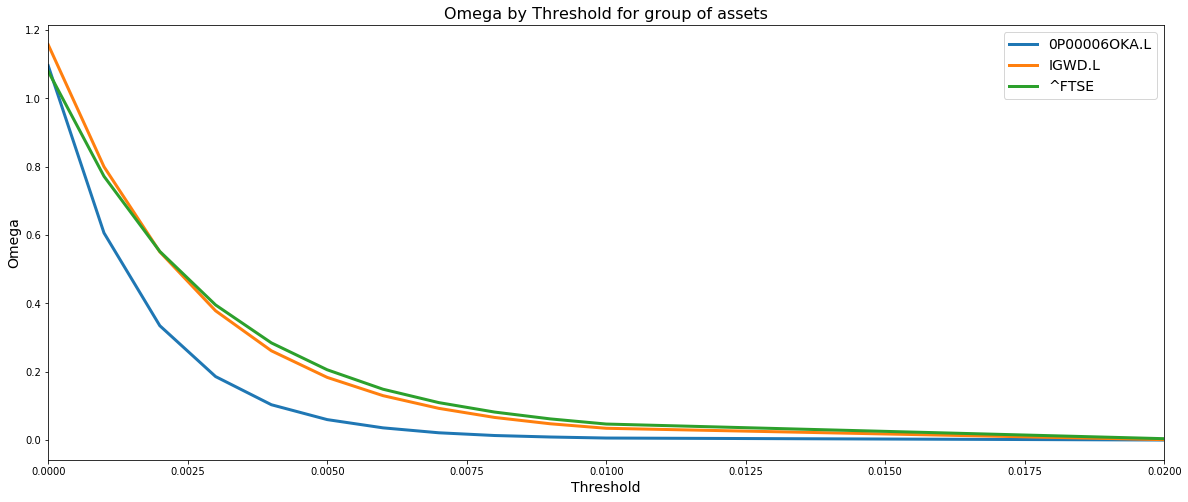

In [8]:
# Run function for some given input
calc_omega([0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02])